# Outlier detection

In [1]:
# important imports
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# function to compute the model score. Using linear Regression model score as a comparison metrics to be sure I don't 
# remove too much data
def accuracy(df):
    
    # seprate the target from the rest of the columns
    X = df.drop(['Life expectancy'], axis=1).values
    y = df['Life expectancy'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    # fitting ang applying a linear regression model on the data
    lr = LinearRegression()
    lr.fit(X_train, y_train)    
    y_pred= lr.predict(X_test)
    
    # printing the errors to compare the results
    mae_sklearn = mean_absolute_error(y_pred, y_test)
    mse_sklearn = mean_squared_error(y_pred, y_test)
    
    # print errors
    print("mean absolute error: {}".format(mae_sklearn))
    print("mean squared error: {}".format(mse_sklearn))
    
    # model score
    score = r2_score(y_test, y_pred)
    print("model score: {}".format(score))

In [3]:
# import dataset
df = pd.read_csv('data1.csv')

In [4]:
# cycle for printing and comparing the model aaccuracy for different contamination values or IsoltionForest algorithm
a = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in a:
    # detecting the outliers (10% of the data)
    clf = IsolationForest(random_state=42, contamination = i)
    pred = clf.fit_predict(df.values)
    
    df_pred = df[np.where(pred == 1, True, False)]
    
    print('Accuracy, contamination = {}:'.format(i))
    accuracy(df_pred)
    print()

Accuracy, contamination = 0.1:
mean absolute error: 2.6903341326300816
mean squared error: 12.65256823949009
model score: 0.8228858517109944

Accuracy, contamination = 0.2:
mean absolute error: 2.652472835863385
mean squared error: 11.766949659507132
model score: 0.7902077710942244

Accuracy, contamination = 0.3:
mean absolute error: 2.409540705024819
mean squared error: 9.763583681418572
model score: 0.7923609775804054

Accuracy, contamination = 0.4:
mean absolute error: 2.2674572107250253
mean squared error: 8.613682298558912
model score: 0.7808120249041486

Accuracy, contamination = 0.5:
mean absolute error: 2.0580333503328574
mean squared error: 7.9626024077322
model score: 0.7311320135897552



In [5]:
print('Accuracy, with outliers')
accuracy(df)

Accuracy, with outliers
mean absolute error: 2.9597523178231184
mean squared error: 14.756597625808762
model score: 0.8354682302349037


After comparing the data above, we see that the error is getting smaller when contamination values get bigger, but at the same time the score is geting smaller. Since my datset is small, I decided to keep 90% of the data (contamination = 0.1), because this way I get smaller errors and the score is unsignificantly smaller than for the dataset with outliers.

In [6]:
# removing the outliers from the initial dataset
clf = IsolationForest(random_state=42, contamination = 0.1)
pred = clf.fit_predict(df.values)
df_pred = df[np.where(pred == 1, True, False)]

In [7]:
# saving df_pred on my PC as data2.csv
df_pred.to_csv('data2.csv', index = False)

## Insights (Business Analysis)

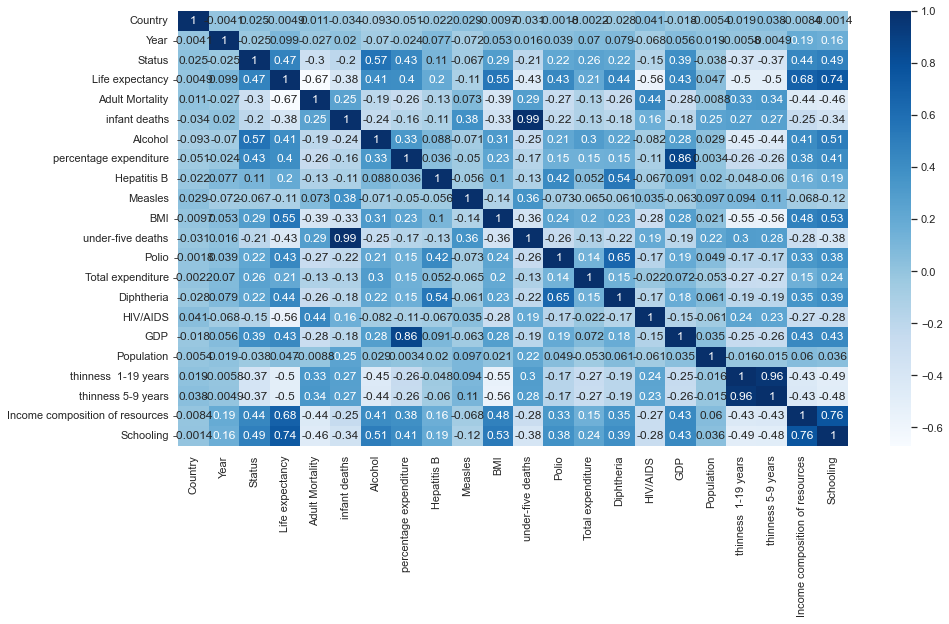

In [11]:
# looking at the correlation between features
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(df_pred.corr(), cmap='Blues', annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
plt.show()

Schooling has the highest correlation with the column Life expectancy, which means that in coutries where the nr of years of schooling is greater, the Life expectancy is greater. Both schooling and the target column are also positively correlated with Income composition of resources. The composition of the total income of a population group or a geographic area refers to the relative share of each income source or group of sources, expressed as a percentage of the aggregate total income of that group or area. Thus, it is clear that the wealth of a country, life expectancy and scooling are interdependent. <br>
Life expectancy has a big negative correlation with dult Moratily, which is logical because higher the probability of dying between 15 and 60 years, lower the Life expectancy (especially because the average Life expectancy is 69.45 years).

In [14]:
# average life expectancy
df['Life expectancy'].mean()

69.4550139275766

In [33]:
# sorting the ds descending by the value of Life expectancy
df_pred.sort_values(by = 'Life expectancy', ascending=False)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2386,149.0,2007.0,1.0,89.0,72.0,2.0,11.05,510.932701,96.000000,267.0,...,96.0,8.36,96.0,0.1,3279.414000,4522683.0,0.6,0.5,0.849,16.0
1888,118.0,2009.0,1.0,89.0,67.0,0.0,6.68,142.374943,81.131175,2.0,...,94.0,9.49,94.0,0.1,817.776810,4828726.0,0.7,0.7,0.936,17.4
897,56.0,2014.0,0.0,89.0,78.0,0.0,8.80,6164.455402,81.131175,0.0,...,98.0,9.68,98.0,0.1,49914.618640,5461512.0,0.9,0.8,0.890,17.0
977,61.0,2014.0,1.0,89.0,69.0,2.0,11.03,941.756291,88.000000,443.0,...,94.0,11.30,95.0,0.1,4792.652880,89825.0,1.1,1.1,0.920,17.0
2027,127.0,2014.0,1.0,89.0,78.0,0.0,9.88,271.254553,98.000000,0.0,...,98.0,9.50,98.0,0.1,2277.536130,14162.0,0.7,0.5,0.837,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,142.0,2006.0,0.0,44.3,464.0,30.0,3.80,38.000758,81.131175,33.0,...,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
1565,97.0,2002.0,0.0,44.0,67.0,46.0,1.10,3.885395,64.000000,92.0,...,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
2276,142.0,2005.0,0.0,43.3,48.0,30.0,3.83,42.088929,81.131175,29.0,...,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8
2278,142.0,2003.0,0.0,41.5,57.0,30.0,4.07,38.614732,81.131175,586.0,...,66.0,11.69,73.0,1.9,263.761831,5199549.0,9.7,9.8,0.322,7.4


We can observe that in top 5 countries with the highest life expectancy (89 years) there is a small number of infant deaths (2 deaths / 1000 population). The consumption of alcohol is greater than average (4.65). The Hepatitis B and Polio immunization coverage among 1-year-olds is always >= average. Higher than average Total expenditure indicate that the government of those countries spend decent amount of money on their healtcare systems. It is interesting to observe that the least 5 countries with lowest life expectancy may spend the same amounts or even more and still have low life expectancy. Another pattern which can be observed is that in top 5 countries people are less affected by HIV/AIDS. Gross domestic product (GDP) is a measurement that seeks to capture a country's economic output. Countries with larger GDPs will have a greater amount of goods and services generated within them, and will generally have a higher standard of living, which is the case here.

<b>TOP 5:</b>
1. Spain
2. Norway
3. Finland
4. Germany
5. Portugal

<b>Last 3:</b>
1. Haiti
2. Sierra Leone
3. Malawi

In [17]:
# mean value for alcohol
df['Alcohol'].mean()

4.65387323943662

In [28]:
# mean and max value for Hepatitis B
df['Hepatitis B'].mean(), df['Hepatitis B'].max()

(81.13117546848382, 99.0)

In [29]:
# mean and max value for Hepatitis B
df['Polio'].mean(), df['Polio'].max()

(82.76532033426184, 99.0)

In [31]:
# mean and max value for Hepatitis B
df['Total expenditure'].mean(), df['Total expenditure'].max()

(5.9327996993611425, 17.6)